In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.DataFrame()
data['X']=pd.Series([95,85,80,70,60])
data['Y']=pd.Series([85,95,70,65,70])

In [3]:
data['Xi-Xbar_wholesquare']=np.square(data['X']-np.mean(data['X']))
data['Yi-Ybar_wholesquare']=np.square(data['Y']-np.mean(data['Y']))

In [4]:
data

,X,Y,Xi-Xbar_wholesquare,Yi-Ybar_wholesquare
0,95,85,289.0,64.0
1,85,95,49.0,324.0
2,80,70,4.0,49.0
3,70,65,64.0,144.0
4,60,70,324.0,49.0


In [5]:
data['X-Xbar*Y-Ybar']=(data['X']-np.mean(data['X']))*(data['Y']-np.mean(data['Y']))

In [6]:
data

,X,Y,Xi-Xbar_wholesquare,Yi-Ybar_wholesquare,X-Xbar*Y-Ybar
0,95,85,289.0,64.0,136.0
1,85,95,49.0,324.0,126.0
2,80,70,4.0,49.0,-14.0
3,70,65,64.0,144.0,96.0
4,60,70,324.0,49.0,126.0


In [7]:
b1=np.sum(data['X-Xbar*Y-Ybar'])/np.sum(data['Xi-Xbar_wholesquare'])
b0=np.mean(data['Y'])-np.mean(data['X'])*b1

In [8]:
b1

0.6438356164383562

In [9]:
b0

26.78082191780822

y=b0+b1*x

In [10]:
data['Ypred']=b0+b1*data['X']

In [11]:
data

,X,Y,Xi-Xbar_wholesquare,Yi-Ybar_wholesquare,X-Xbar*Y-Ybar,Ypred
0,95,85,289.0,64.0,136.0,87.945205
1,85,95,49.0,324.0,126.0,81.506849
2,80,70,4.0,49.0,-14.0,78.287671
3,70,65,64.0,144.0,96.0,71.849315
4,60,70,324.0,49.0,126.0,65.410959


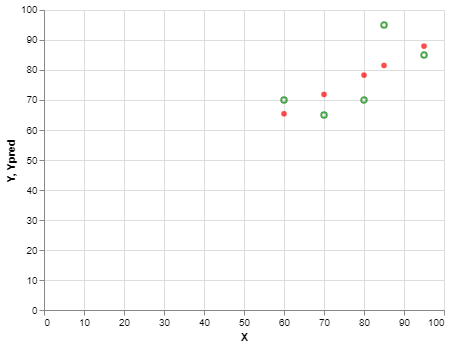

In [22]:
import altair as alt
alt.renderers.enable('notebook')
points = alt.Chart(data).mark_point(color='green').encode(
    x=alt.X('X', title='X'),
    y=alt.Y('Y',title='Y') 
)
points1 = alt.Chart(data).mark_circle(color='red').encode(
    x=alt.X('X', title='X'),
    y=alt.Y('Ypred',title='Ypred') 
)
points+points1

In [45]:
line=pd.DataFrame()
line['X']=pd.Series(np.arange(np.min(data['X']),np.max(data['X'])))
line['Y']=b0+b1*line['X']

In [51]:
lower_limit=20
upper_limit=20
over_boundary_line=pd.DataFrame()
over_boundary_line['X']=pd.Series(np.arange(np.min(data['X'])-lower_limit,np.min(data['X']))).append(pd.Series(np.arange(np.max(data['X']),np.max(data['X'])+upper_limit)),ignore_index=True)
over_boundary_line['Y']=b0+b1*over_boundary_line['X']

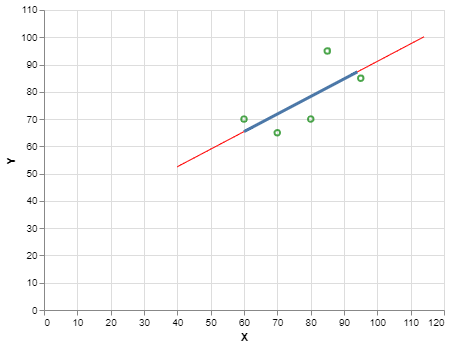

In [53]:
points = alt.Chart(data).mark_point(color='green').encode(
    x=alt.X('X', title='X'),
    y=alt.Y('Y',title='Y') 
)
regression_line=alt.Chart(line).mark_line(size=3).encode(
    x=alt.X('X'),
    y=alt.Y('Y')
)
over_boundary_regression_line=alt.Chart(over_boundary_line).mark_line(size=1,color='red').encode(
    x=alt.X('X'),
    y=alt.Y('Y')
)
points+over_boundary_regression_line+regression_line

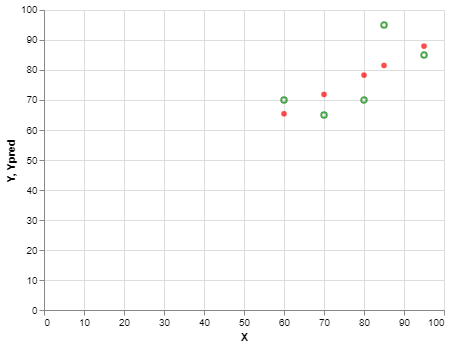

In [49]:
points = alt.Chart(data).mark_point(color='green').encode(
    x=alt.X('X', title='X'),
    y=alt.Y('Y',title='Y') 
)
points1 = alt.Chart(data).mark_circle(color='red').encode(
    x=alt.X('X', title='X'),
    y=alt.Y('Ypred',title='Ypred') 
)
points+points1

In [54]:
data[['X','Y','Ypred']]

,X,Y,Ypred
0,95,85,87.945205
1,85,95,81.506849
2,80,70,78.287671
3,70,65,71.849315
4,60,70,65.410959


In [55]:
data['error']=data['Y']-data['Ypred']

In [76]:
data[['X','Y','Ypred','error']]

,X,Y,Ypred,error
0,95,85,87.945205,-2.945205
1,85,95,81.506849,13.493151
2,80,70,78.287671,-8.287671
3,70,65,71.849315,-6.849315
4,60,70,65.410959,4.589041


In [77]:
rmse=np.sqrt(np.sum(np.square(data['error']))/(len(data)-1))

In [78]:
rmse

9.047061128813771

In [69]:
from CorrelationCoefficent import correlation,standardDeviation
correlation(np.array(data['X']),np.array(data['Y']))

0.6930525298193004

In [70]:
rmse=np.sqrt(1-np.square(correlation(np.array(data['X']),np.array(data['Y']))))*standardDeviation(data['Y'])

In [71]:
rmse

9.047061128813773

In [87]:
from simpleLinearRegressionManual import simpleRegressionCoeefficients

In [88]:
simpleRegressionCoeefficients(np.array([95,85,80,70,60]),np.array([85,95,70,65,70]))

[26.78082191780822, 0.6438356164383562]

In [89]:
from simpleLinearRegressionManual import rmse
rmse(np.array([95,85,80,70,60]),np.array([85,95,70,65,70]))

9.047061128813771

Actually our data is very small to do test and train slipt so we will train with all the data available.

In [90]:
from sklearn import linear_model

In [137]:
regressor=linear_model.LinearRegression()

In [138]:
x=np.array([95,85,80,70,60]).reshape(-1,1)
y=np.array([85,95,70,65,70])
regressor.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [141]:
regressor.intercept_

26.780821917808225

In [142]:
regressor.coef_

array([0.64383562])

In [149]:
regressor.predict(np.array([95]).reshape(-1,1))

array([87.94520548])

In [150]:
regressor.rank_

1

In [151]:
regressor.singular_

array([27.01851217])

In [152]:
regressor.score(x,y)

0.4803218090889325

shape of input array must be taken care of (x,1) (x,) for sklearn